In [1]:
## Use of Transfer learning
## Importing libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorboard\co

In [2]:
## Re-sizing all the images
image_size = [224, 224] ## ResNet50 works well with this image size. otherwise we can give any values. image_size=[height, width]

train_path = 'datasets/train'
test_path = 'datasets/test'

In [3]:
## Import ResNet50 library and add preprocessing layer to the front of ResNet50

resnet = ResNet50(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

## [3] is used for RGB Channel
## we are using 'imagenet' weights (pre-trained)
## if we have 3 output category the we won't have to use TRUE. bcz we won't need first and last.

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
## This will not train existing weights, we will only train last layer.
for layer in resnet.layers:
    layer.trainable = False

In [6]:
## GLOB is useful for getting numbers of folders
folders = glob('datasets/train/*')

In [7]:
folders

['datasets/train\\audi',
 'datasets/train\\lamborghini',
 'datasets/train\\mercedes']

In [8]:
## Flattening the layer (we can add more layers too)
X = Flatten()(resnet.output)

In [9]:
## Creating DENSE layer. It will give us 3 Ouptputs
prediction = Dense(len(folders), activation = 'softmax')(X)

## Create model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
## Using ImageDataGenerator we are creating diff. types of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Scaling down the images, so that calculation can happen quickly
## Data Augmentation in train data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

## We should not do Data Augmentation in Test Data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
## Read images from directory and target_size sould be same as image_size
## Reading images from training datasets
training_set = train_datagen.flow_from_directory('datasets/train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 105 images belonging to 3 classes.


In [14]:
## Reading images from test datasets
test_set =  train_datagen.flow_from_directory('datasets/test',
                                             target_size = (224, 224),
                                             batch_size = (32),
                                              class_mode = "categorical"
                                             )


Found 58 images belonging to 3 classes.


In [15]:
## Fitting the model
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - ETA: 0s - loss: 6.5674 - accuracy: 0.4000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025A00028D08> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUT

Epoch 46/50
4/4 [==============================] - 13s 4s/step - loss: 0.4443 - accuracy: 0.8381 - val_loss: 0.8874 - val_accuracy: 0.6552
Epoch 47/50
4/4 [==============================] - 13s 3s/step - loss: 0.2389 - accuracy: 0.9238 - val_loss: 1.1803 - val_accuracy: 0.5517
Epoch 48/50
4/4 [==============================] - 13s 3s/step - loss: 0.2743 - accuracy: 0.8857 - val_loss: 1.1767 - val_accuracy: 0.7069
Epoch 49/50
4/4 [==============================] - 13s 3s/step - loss: 0.2827 - accuracy: 0.8857 - val_loss: 1.1673 - val_accuracy: 0.5345
Epoch 50/50
4/4 [==============================] - 13s 4s/step - loss: 0.2690 - accuracy: 0.8857 - val_loss: 0.7686 - val_accuracy: 0.7414


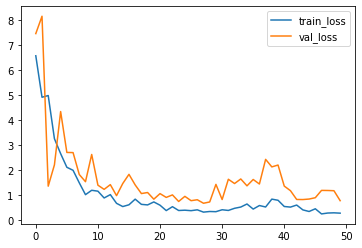

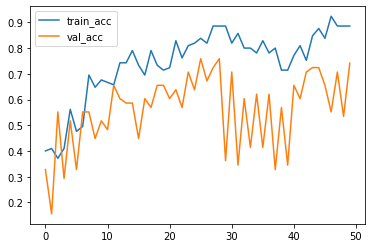

<Figure size 432x288 with 0 Axes>

In [16]:
## Plot the loss
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss') ## Validation loss is for test data
plt.legend()
plt.show()
plt.savefig('Loss_Val_loss')

## Plot the accuracy
plt.plot(r.history['accuracy'], label = 'train_acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_Val_acc')

In [17]:
## Save it as h5 file
from tensorflow.keras.models import load_model
model.save('car_model_resnet50.h5')

C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Predicting the right image

In [18]:
y_pred = model.predict(test_set)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [19]:
y_pred ## It gives the probability based on 3 classes

array([[9.66806889e-01, 1.19248843e-02, 2.12681890e-02],
       [4.29654807e-01, 5.21045566e-01, 4.92996350e-02],
       [5.81741892e-03, 5.70319176e-01, 4.23863411e-01],
       [1.75271672e-03, 9.96157229e-01, 2.09002732e-03],
       [9.81501769e-03, 8.03705812e-01, 1.86479196e-01],
       [9.95200157e-01, 4.54771711e-04, 4.34503984e-03],
       [3.49805415e-01, 1.40861452e-01, 5.09333134e-01],
       [1.35886073e-02, 4.34093863e-01, 5.52317560e-01],
       [2.06939946e-03, 9.92924809e-01, 5.00585046e-03],
       [3.52679162e-05, 9.93127584e-01, 6.83718733e-03],
       [3.40664610e-02, 9.03712273e-01, 6.22213259e-02],
       [7.87151512e-04, 9.81765389e-01, 1.74474809e-02],
       [2.45739939e-03, 8.29775035e-01, 1.67767569e-01],
       [8.82494971e-02, 6.71997726e-01, 2.39752859e-01],
       [1.03373602e-02, 4.09066021e-01, 5.80596626e-01],
       [5.47211431e-03, 8.68188560e-01, 1.26339301e-01],
       [5.19292355e-02, 2.38896534e-03, 9.45681810e-01],
       [1.40254421e-03, 7.76540

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1) ## Selecting the higest probability for the right prediction

In [21]:
y_pred ## Output

array([0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0], dtype=int64)

## Importing h5 model file and trying to predict the output

In [22]:
## importing model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model = load_model('car_model_resnet50.h5')

In [24]:
## Loading the image
img = image.load_img('datasets/test/mercedes/28.jpg', target_size=(224, 224))

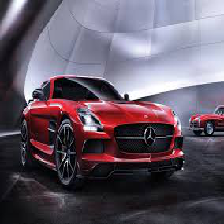

In [25]:
img

In [33]:
## Converting image into array
x = image.img_to_array(img)
# x

In [27]:
x.shape

(224, 224, 3)

In [34]:
x = x/255 ## In test data we divided image by 255, so we have to do the same here as well
# x

In [29]:
## Expanding the dimentions
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.70931756, 0.02406155, 0.26662093]], dtype=float32)

In [31]:
ans = np.argmax(model.predict(img_data), axis = 1)

In [37]:
ans

array([0], dtype=int64)